# **Business Case: Delhivery - Feature Engineering**

**About Delhivery**

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

**How can you help here?**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

## Importing modules and Loading dataset

In [ ]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Loading dataset
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181' -O delhivery_data.csv
df = pd.read_csv('/content/delhivery_data.csv')

--2024-09-25 14:11:25--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 65.8.234.72, 65.8.234.36, 65.8.234.174, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|65.8.234.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55617130 (53M) [text/plain]
Saving to: ‘delhivery_data.csv’

delhivery_data.csv  100%[===================>]  53.04M  65.8MB/s    in 0.8s    

2024-09-25 14:11:26 (65.8 MB/s) - ‘delhivery_data.csv’ saved [55617130/55617130]



## Basic Metrics

In [ ]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
# shape
df.shape

(144867, 24)

In [ ]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

## Basic Data Cleaning

### Dropping unknown fields

In [ ]:
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown_fields)

### Reducing Memory

In [ ]:
df.nunique()

,0
data,2
trip_creation_time,14817
route_schedule_uuid,1504
route_type,2
trip_uuid,14817
source_center,1508
source_name,1498
destination_center,1481
destination_name,1468
od_start_time,26369


In [ ]:
# Converting the datatype of columns having 2 unique entries to Category
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

In [ ]:
df.select_dtypes(include='float64').max()

,0
start_scan_to_end_scan,7898.000000
actual_distance_to_destination,1927.447705
actual_time,4532.000000
osrm_time,1686.000000
osrm_distance,2326.199100
segment_actual_time,3051.000000
segment_osrm_time,1611.000000
segment_osrm_distance,2191.403700


In [ ]:
# Updating the float64 datatype to float32 since the maximum value entry is small
for i in df.select_dtypes(include='float64').columns:
  df[i] = df[i].astype('float32')

In [ ]:
# Updating the datatype of the datetime columns
datetime_columns = ['trip_creation_time', 'od_start_time', 'od_end_time']
for i in datetime_columns:
    df[i] = pd.to_datetime(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

Earlier the dataset was using 25.6+ MB of memory but now it has been reduced to 14.6+ MB i.e., around 40% reduction in memory usage.

### Checking duplicates

In [ ]:
df.duplicated().sum()

0

### Handling Null values

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,293
destination_center,0
destination_name,261
od_start_time,0


In [ ]:
missing_source_center = df.loc[df['source_name'].isnull(), 'source_center'].unique()
missing_destination_center = df.loc[df['destination_name'].isnull(), 'destination_center'].unique()
missing_center = np.union1d(missing_source_center,missing_destination_center)
missing_center

array(['IND122015AAC', 'IND126116AAA', 'IND221005A1A', 'IND250002AAC',
       'IND282002AAD', 'IND331001A1C', 'IND331022A1B', 'IND342902A1B',
       'IND465333A1B', 'IND505326AAB', 'IND509103AAC', 'IND577116AAA',
       'IND841301AAC', 'IND852118A1B'], dtype=object)

In [ ]:
df_ms = df.loc[df['source_center'].isin(missing_center)]
df_md = df.loc[df['destination_center'].isin(missing_center)]
df_mc = pd.concat([df_ms, df_md])

In [ ]:
# percentage of the rows containing null values
(df_mc.size/df.size)*100

0.3824197367240296

We can see that only 0.3% of the data contains some null values. Hence dropping them cannot cause an issue.

In [ ]:
# drpping null values
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


## Merging of rows and aggregation of fields

Since delivery details of one package are divided into several rows i.e., consists of intermediate destinations (like that of connecting flights to reach a particular destination), performing grouping of rows to get delivery details of each order per row.

In [ ]:
cols = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = cols, as_index = False).agg({'data' : 'first',
                                                   'route_type' : 'first',
                                                   'trip_creation_time' : 'first',
                                                   'source_name' : 'first',
                                                   'destination_name' : 'last',
                                                   'od_start_time' : 'first',
                                                   'od_end_time' : 'first',
                                                   'start_scan_to_end_scan' : 'first',
                                                   'actual_distance_to_destination' : 'last',
                                                   'actual_time' : 'last',
                                                   'osrm_time' : 'last',
                                                   'osrm_distance' : 'last',
                                                   'segment_actual_time' : 'sum',
                                                   'segment_osrm_time' : 'sum',
                                                   'segment_osrm_distance' : 'sum'})
df1

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759155,732.0,329.0,446.549591,728.0,534.0,670.620483
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973694,830.0,388.0,544.802673,820.0,474.0,649.852783
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644020,47.0,26.0,28.199400,46.0,26.0,28.199501
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542889,96.0,42.0,56.911598,95.0,39.0,55.989899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439606,611.0,212.0,281.210907,608.0,231.0,317.740784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.521301,49.0,42.0,42.143101
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673836,90.0,48.0,40.608002,89.0,77.0,78.586899
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661944,30.0,14.0,16.018499,29.0,14.0,16.018400
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,test,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546738,233.0,42.0,52.530300,233.0,42.0,52.530300


In [ ]:
# Time taken between od_start_time and od_end_time
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))

# Dropping original columns
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)

In [ ]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732849,1562.0,717.0,991.352295,1548.0,1008.0,1320.473267
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186905,143.0,68.0,85.111000,141.0,65.0,84.189400
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404297,3347.0,1740.0,2354.066650,3308.0,1941.0,2545.267822
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.680000,59.0,16.0,19.876600
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448502,341.0,117.0,146.791794,340.0,115.0,146.791901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),258.03,257.0,57.762333,83.0,62.0,73.462997,82.0,62.0,64.855103
14783,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),60.59,60.0,15.513784,21.0,12.0,16.088200,21.0,11.0,16.088299
14784,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),422.12,421.0,38.684837,282.0,48.0,58.903702,281.0,88.0,104.886597
14785,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),348.52,347.0,134.723831,264.0,179.0,171.110306,258.0,221.0,223.532394


## Creating new features

In [ ]:
def get_state(x):
  l = x.split('(')
  if len(l) == 1:
    return l[0]
  else:
    return l[1].replace(')', "")

In [ ]:
def get_city(x):
  l = x.split()[0].split('_')
  if 'CCU' in x:
    return 'Kolkata'
  elif 'MAA' in x.upper():
    return 'Chennai'
  elif ('HBR' in x.upper()) or ('BLR' in x.upper()) or ('BANGALORE' in x.upper()):
    return 'Bengaluru'
  elif 'FBD' in x.upper():
    return 'Faridabad'
  elif 'BOM' in x.upper():
    return 'Mumbai'
  elif 'DEL' in x.upper():
    return 'Delhi'
  elif 'OK' in x.upper():
    return 'Delhi'
  elif 'GZB' in x.upper():
    return 'Ghaziabad'
  elif 'GGN' in x.upper():
    return 'Gurgaon'
  elif 'AMD' in x.upper():
    return 'Ahmedabad'
  elif 'CJB' in x.upper():
    return 'Coimbatore'
  elif 'HYD' in x.upper():
    return 'Hyderabad'
  return l[0]

In [ ]:
def get_place(x):
  l = x.split()[0].split('_', 1)
  if len(l) == 1:
    return 'unknown'
  else:
    return l[1]

In [ ]:
# creating city, state, place features
df2['source_state'] = df2['source_name'].apply(get_state)
df2['source_city'] = df2['source_name'].apply(get_city)
df2['source_place'] = df2['source_name'].apply(get_place)
df2['destination_state'] = df2['destination_name'].apply(get_state)
df2['destination_city'] = df2['destination_name'].apply(get_city)
df2['destination_place'] = df2['destination_name'].apply(get_place)
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,source_place,destination_state,destination_city,destination_place,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_week
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,...,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12,12,9,2018,0,37
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,...,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12,9,2018,0,37
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,...,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12,12,9,2018,0,37
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,...,unknown,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12,9,2018,0,37
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,...,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12,12,9,2018,0,37


In [ ]:
# creating features based on time
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week

# reducing memory size
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')

df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,source_place,destination_state,destination_city,destination_place,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_week
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,...,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12,12,9,2018,0,37
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,...,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12,9,2018,0,37
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,...,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12,12,9,2018,0,37
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,...,unknown,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12,9,2018,0,37
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,...,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12,12,9,2018,0,37


In [ ]:
df2.shape

(14787, 29)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   source_center                   14787 non-null  object        
 2   destination_center              14787 non-null  object        
 3   data                            14787 non-null  category      
 4   route_type                      14787 non-null  category      
 5   trip_creation_time              14787 non-null  datetime64[ns]
 6   source_name                     14787 non-null  object        
 7   destination_name                14787 non-null  object        
 8   od_total_time                   14787 non-null  float64       
 9   start_scan_to_end_scan          14787 non-null  float32       
 10  actual_distance_to_destination  14787 non-null  float32       
 11  ac

## Descriptive Statistics

In [ ]:
df2.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,14787,2018-09-22 12:26:28.269885696,2018-09-12 00:00:16.535741,2018-09-17 02:38:18.128431872,2018-09-22 03:39:19.609193984,2018-09-27 19:23:14.074359552,2018-10-03 23:59:42.701692,NaN
od_total_time,14787.0,530.313468,23.46,149.695,279.71,633.535,7898.55,658.415416
start_scan_to_end_scan,14787.0,529.429016,23.0,149.0,279.0,632.0,7898.0,658.254944
actual_distance_to_destination,14787.0,164.090195,9.002461,22.777099,48.287895,163.591255,2186.531738,305.502991
actual_time,14787.0,356.306,9.0,67.0,148.0,367.0,6265.0,561.517944
osrm_time,14787.0,160.990936,6.0,29.0,60.0,168.0,2032.0,271.459503
osrm_distance,14787.0,203.887405,9.0729,30.7569,65.302795,206.644203,2840.081055,370.565552
segment_actual_time,14787.0,353.059174,9.0,66.0,147.0,364.0,6230.0,556.365906
segment_osrm_time,14787.0,180.511597,6.0,30.0,65.0,184.0,2564.0,314.679291
segment_osrm_distance,14787.0,222.705444,9.0729,32.57885,69.784203,216.560608,3523.632324,416.846283


In [ ]:
df2.describe(include='object').T

,count,unique,top,freq
trip_uuid,14787,14787,trip-153671041653548748,1
source_center,14787,930,IND000000ACB,1052
destination_center,14787,1035,IND000000ACB,821
source_name,14787,930,Gurgaon_Bilaspur_HB (Haryana),1052
destination_name,14787,1035,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14787,29,Maharashtra,2714
source_city,14787,686,Mumbai,1442
source_place,14787,754,Bilaspur_HB,1052
destination_state,14787,31,Maharashtra,2561
destination_city,14787,804,Mumbai,1548


- Top source and destination center is Gurgaon_Bilaspur_HB (Haryana).
- Source of most of the orders is Mumbai and destination is also Mumbai.

## Exploratory Data Analysis

### Training vs Testing data

In [ ]:
df2['data'].value_counts()

,count
data,
training,10645
test,4142


[]

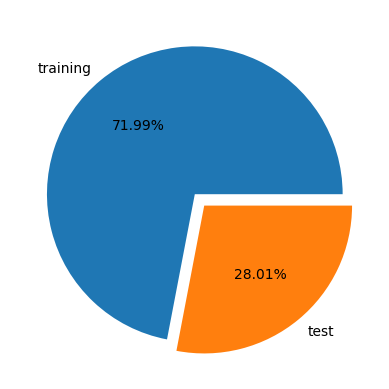

In [ ]:
plt.pie(x = df2['data'].value_counts(),
        labels = df2['data'].value_counts().index,
        explode = [0, 0.1],
        autopct = '%.2f%%')
plt.plot()

### Source Analysis

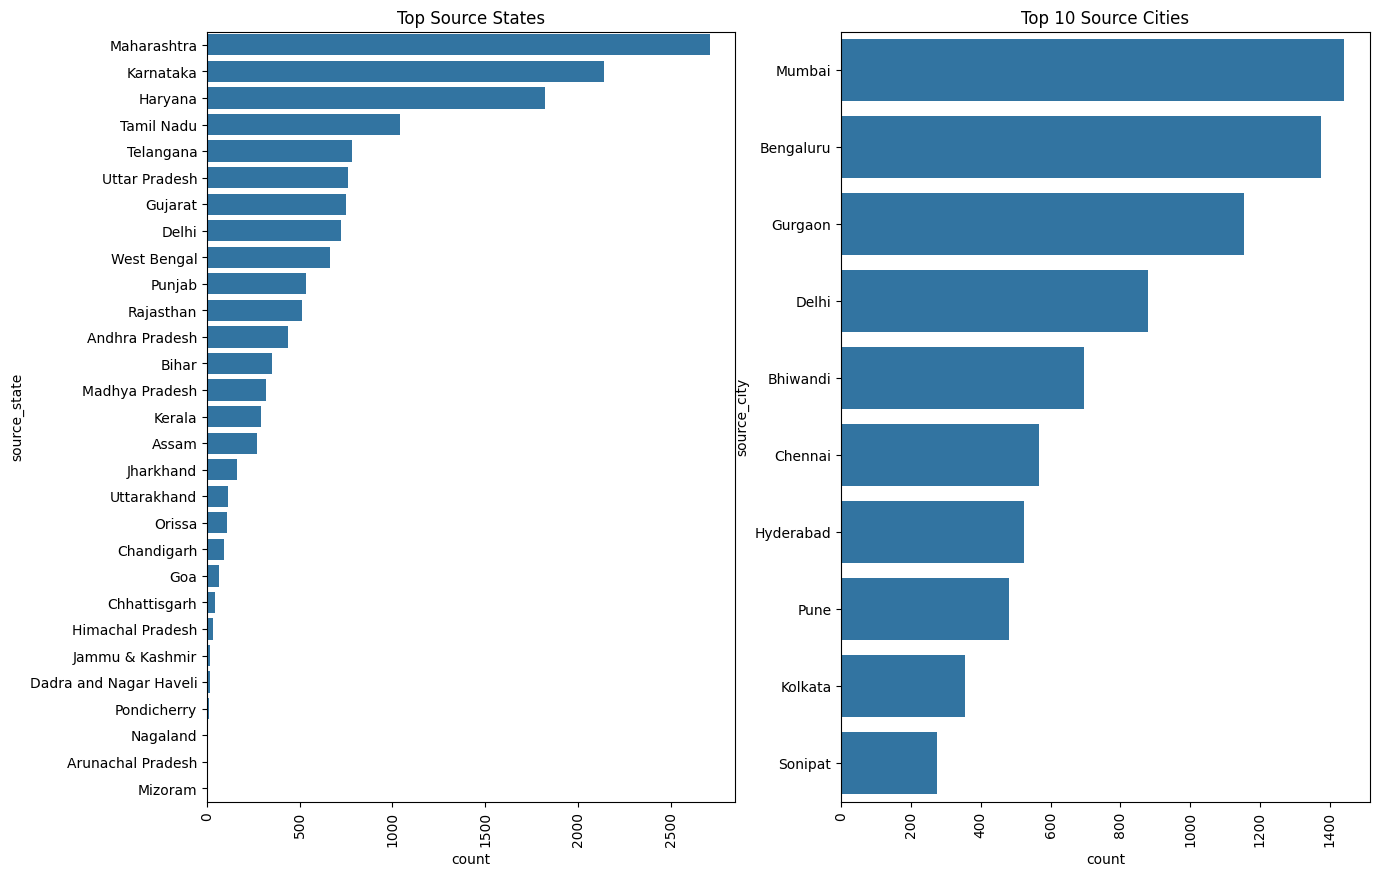

In [ ]:
fig = plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
plt.title('Top Source States')
sns.countplot(y = 'source_state', data = df2, order = df2['source_state'].value_counts().index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.title('Top 10 Source Cities')
sns.countplot(y = 'source_city', data = df2, order = df2['source_city'].value_counts().head(10).index)
plt.xticks(rotation = 90)

plt.show()

### Destination Analysis

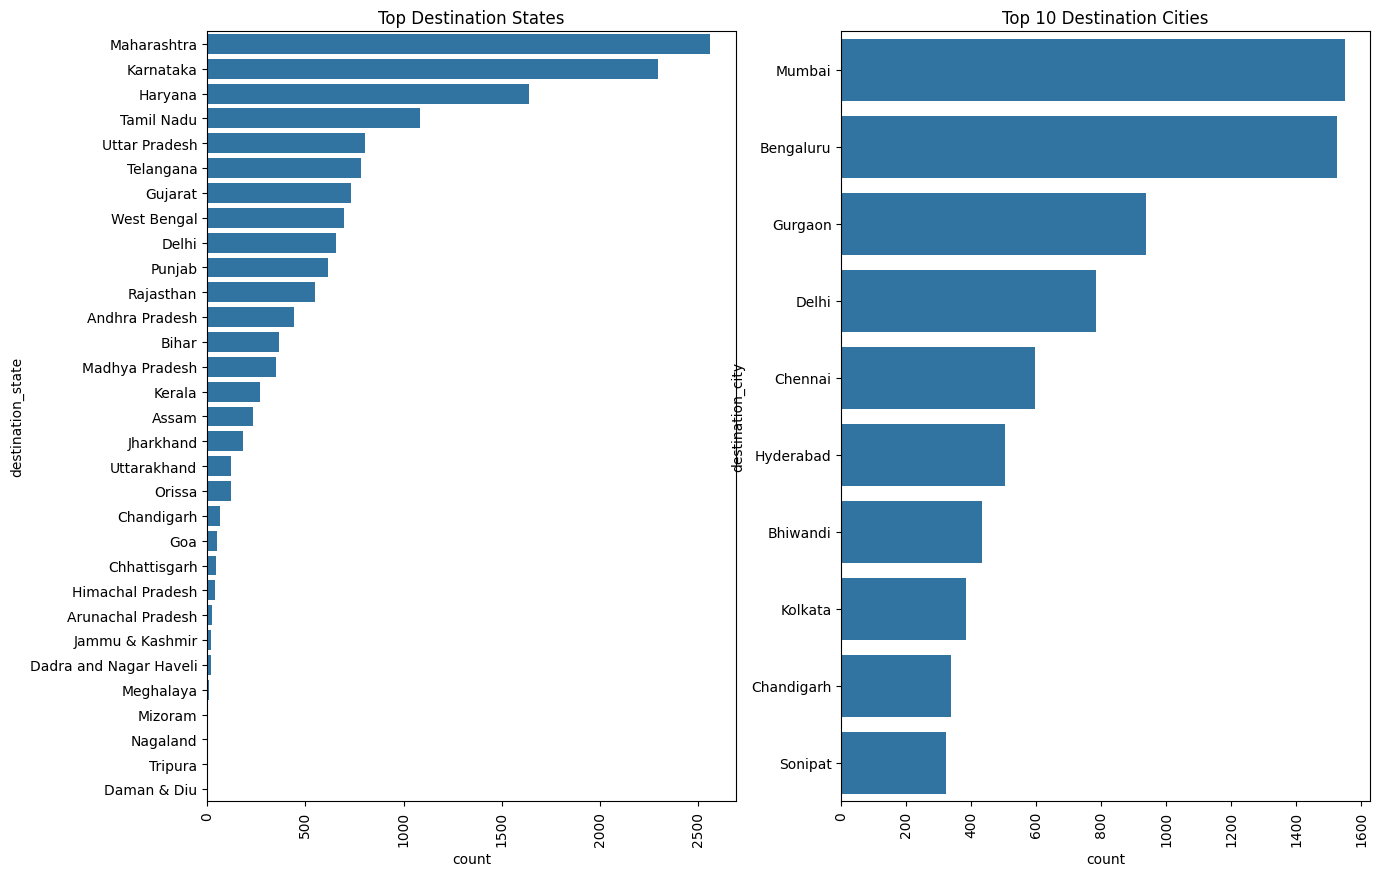

In [ ]:
fig = plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
plt.title('Top Destination States')
sns.countplot(y = 'destination_state', data = df2, order = df2['destination_state'].value_counts().index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.title('Top 10 Destination Cities')
sns.countplot(y = 'destination_city', data = df2, order = df2['destination_city'].value_counts().head(10).index)
plt.xticks(rotation = 90)

plt.show()

### Month wise analysis

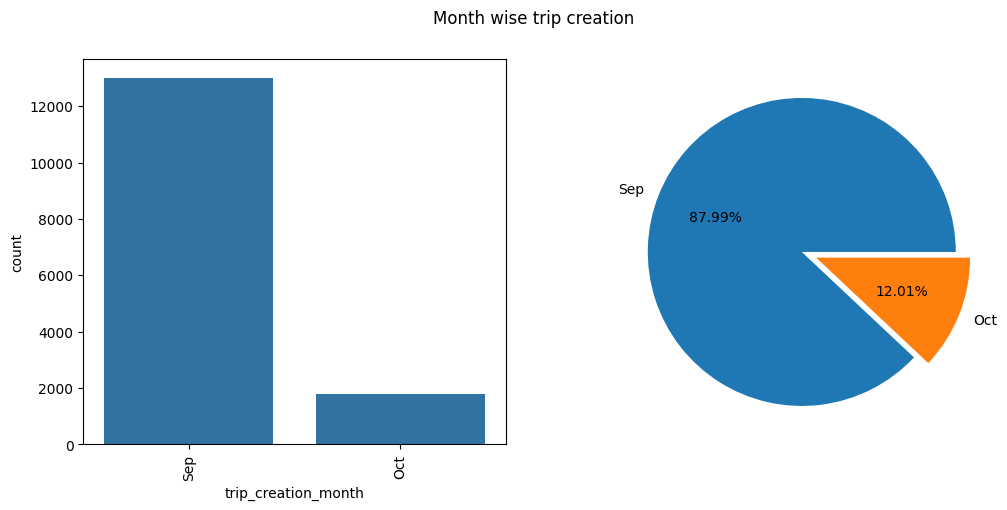

In [ ]:
fig = plt.figure(figsize = (12,5)).suptitle('Month wise trip creation')

plt.subplot(1,2,1)
sns.countplot(x = 'trip_creation_month', data = df2)
plt.xticks(rotation = 90, ticks=[0,1], labels = ['Sep', 'Oct'])

plt.subplot(1,2,2)
plt.pie(x = df2['trip_creation_month'].value_counts(),
        labels = ['Sep', 'Oct'],
        explode = [0, 0.1],
       autopct = '%.2f%%')

plt.show()

### Trip Creation by Hour and Day





[]

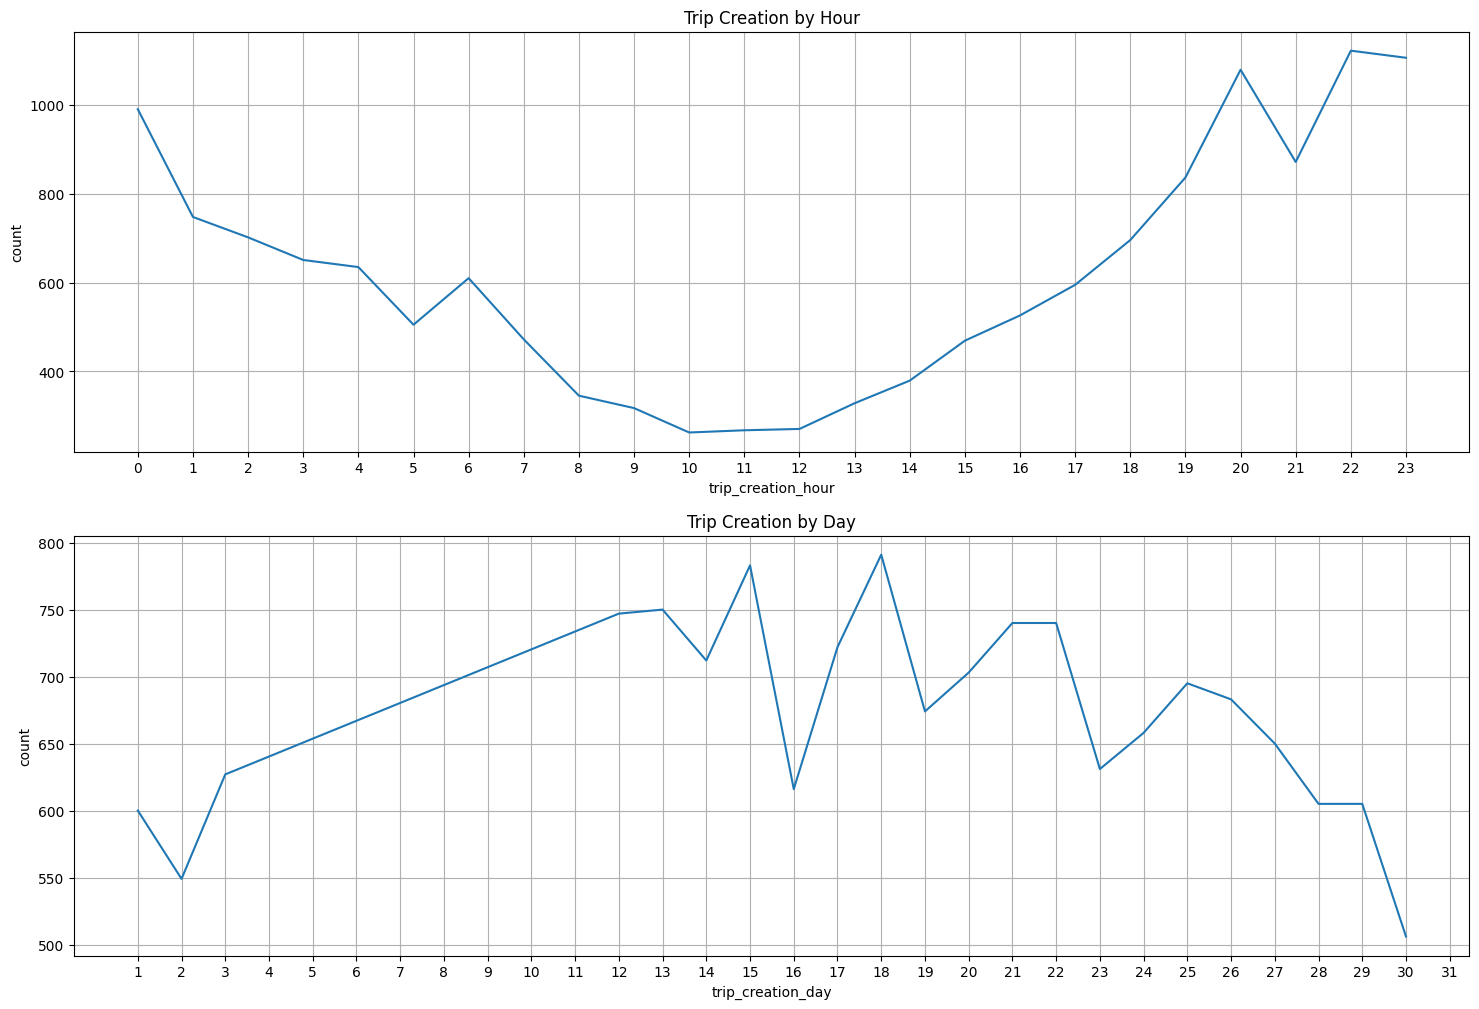

In [ ]:
fig = plt.figure(figsize = (18, 12))

plt.subplot(2,1,1)
plt.title('Trip Creation by Hour')
sns.lineplot(data = df2['trip_creation_hour'].value_counts().reset_index().sort_values(by = 'trip_creation_hour'),
             x ='trip_creation_hour',
             y = 'count')
plt.xticks(np.arange(0,24))
plt.grid('both')

plt.subplot(2,1,2)
plt.title('Trip Creation by Day')
sns.lineplot(data = df2['trip_creation_day'].value_counts().reset_index().sort_values(by = 'trip_creation_day'),
             x ='trip_creation_day',
             y = 'count')
plt.xticks(np.arange(1,32))
plt.grid('both')

plt.plot()

### Pair Plot

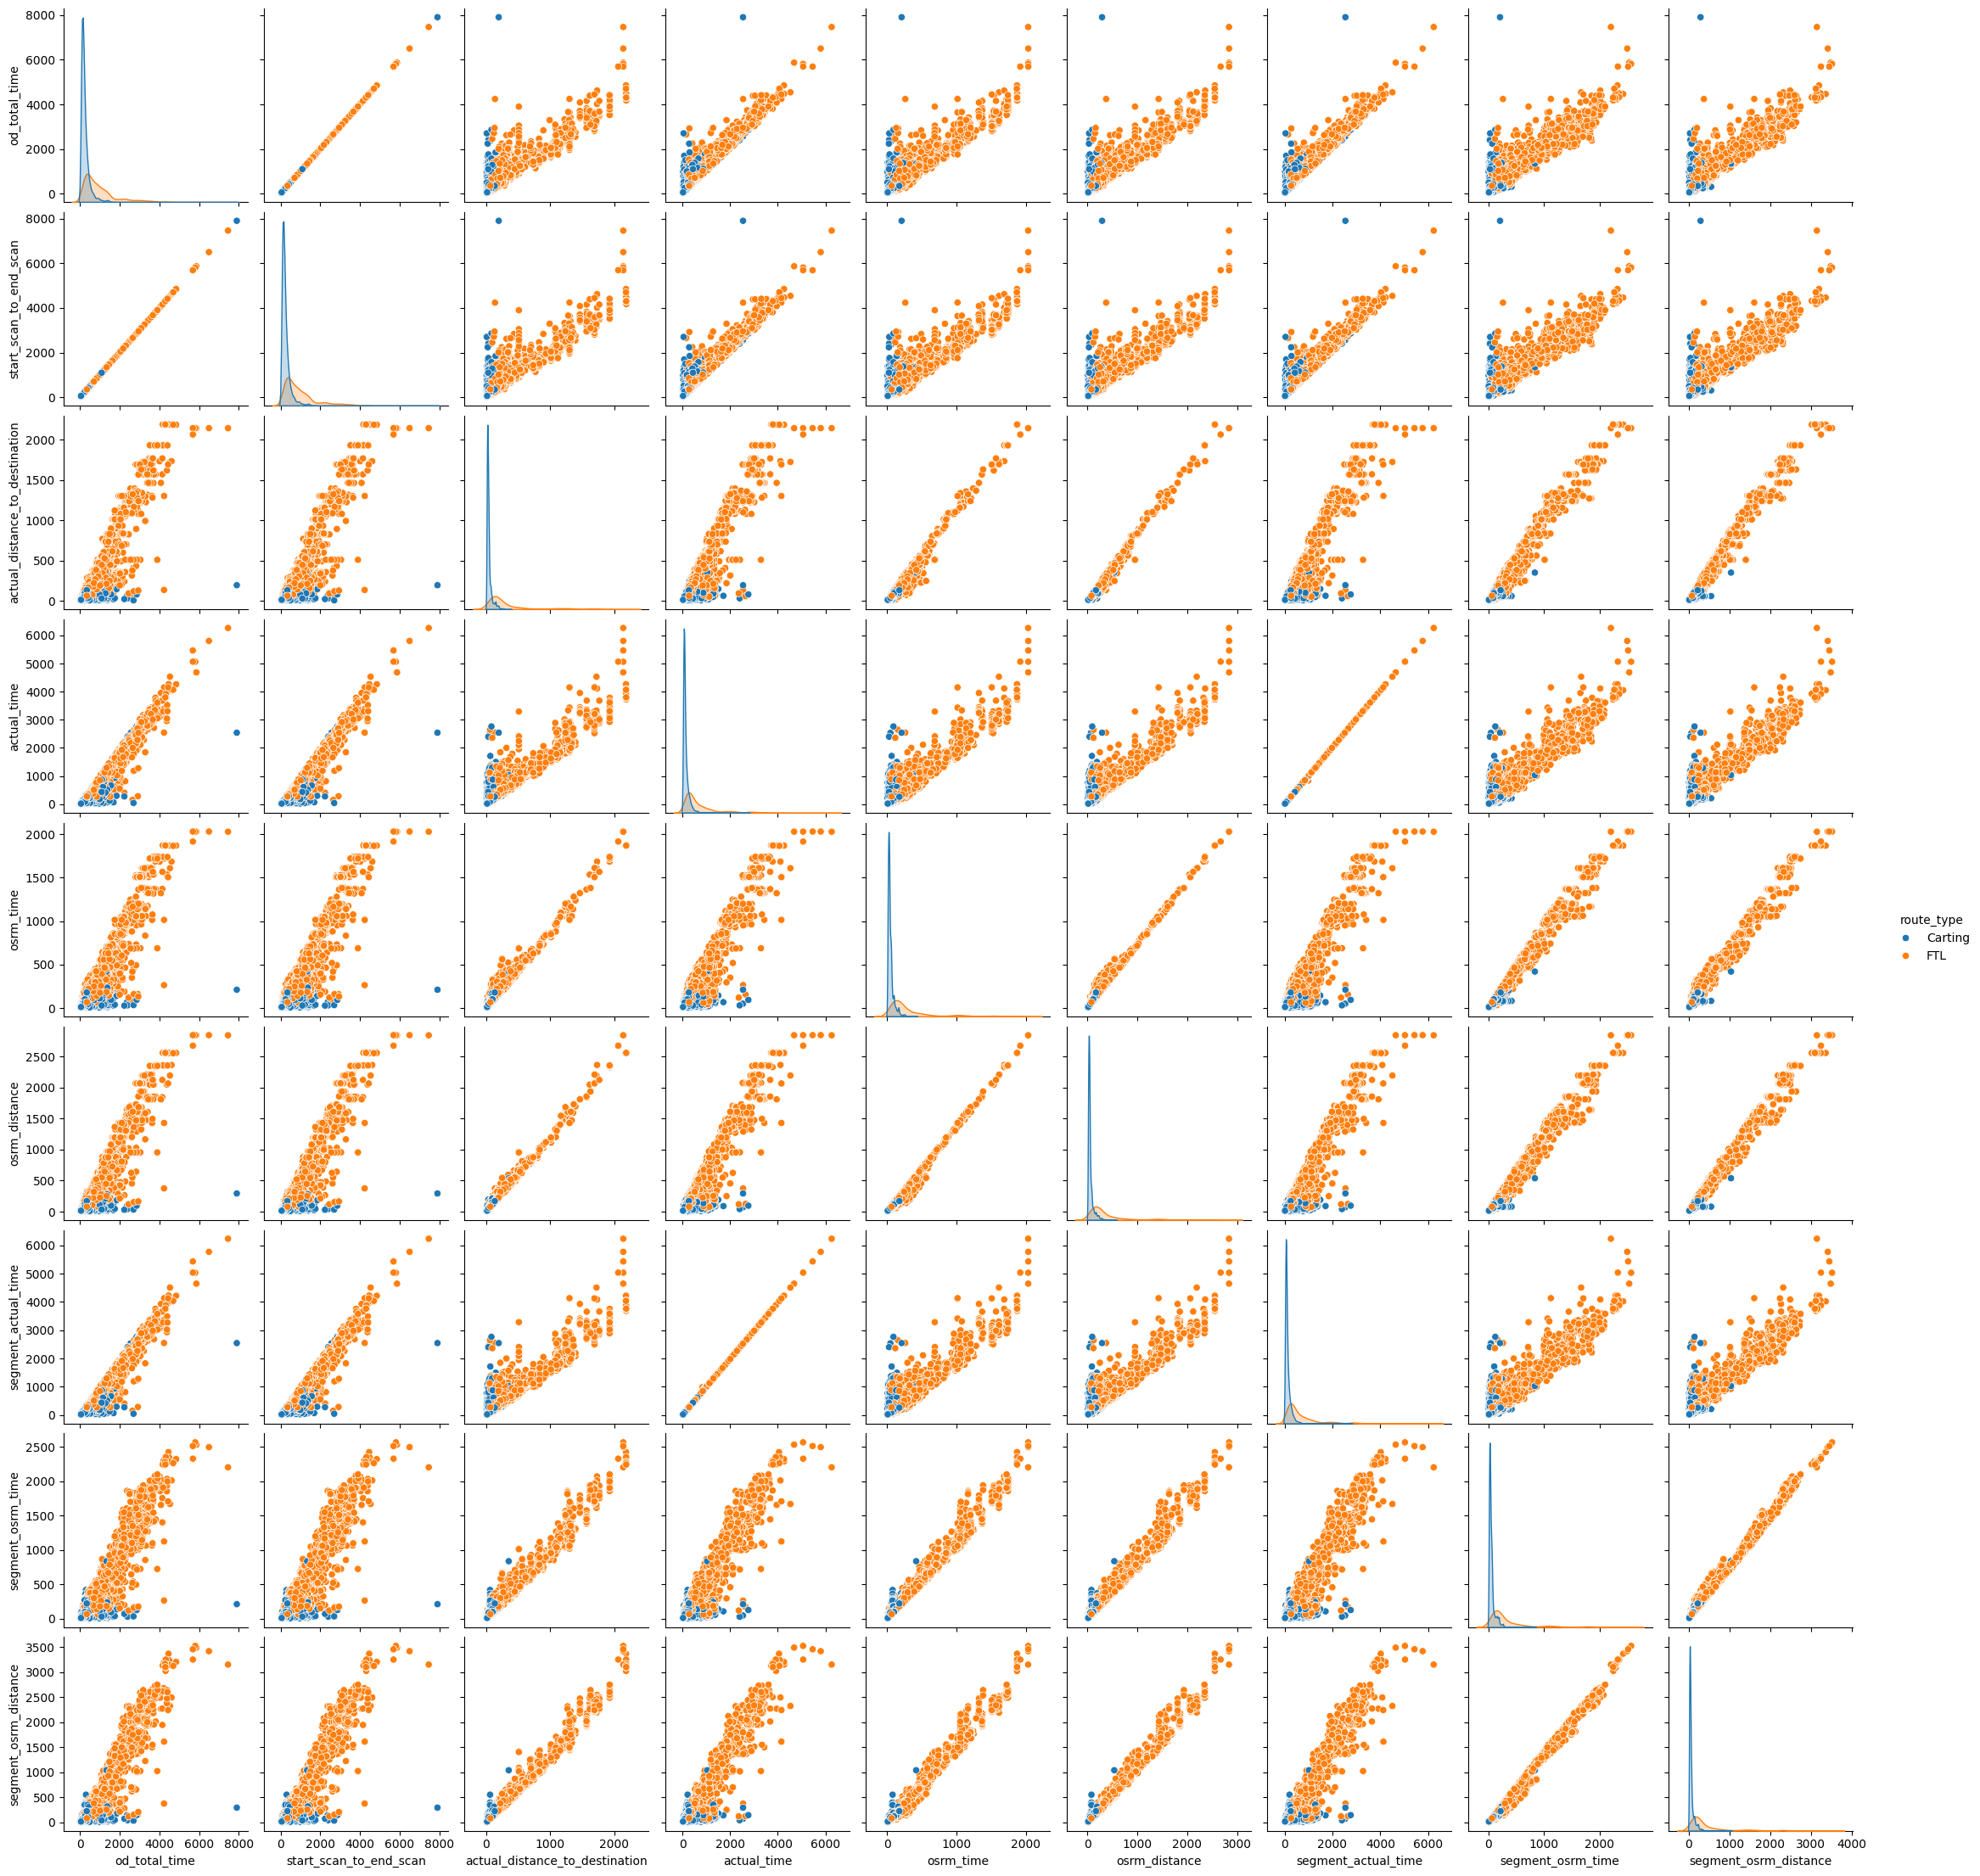

In [ ]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']

sns.pairplot(data = df2, vars = numerical_columns, hue = 'route_type')
plt.show()

### Heat map

In [ ]:
corr_df = df2[numerical_columns].corr()
corr_df

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,0.999999,0.919074,0.961560,0.927416,0.925126,0.961582,0.919358,0.920099
start_scan_to_end_scan,0.999999,1.000000,0.919159,0.961612,0.927471,0.925205,0.961634,0.919429,0.920191
actual_distance_to_destination,0.919074,0.919159,1.000000,0.953920,0.993568,0.997268,0.952987,0.987542,0.993068
actual_time,0.961560,0.961612,0.953920,1.000000,0.958781,0.959398,0.999989,0.954044,0.957151
osrm_time,0.927416,0.927471,0.993568,0.958781,1.000000,0.997588,0.957955,0.993263,0.991624
osrm_distance,0.925126,0.925205,0.997268,0.959398,0.997588,1.000000,0.958540,0.991802,0.994712
segment_actual_time,0.961582,0.961634,0.952987,0.999989,0.957955,0.958540,1.000000,0.953214,0.956293
segment_osrm_time,0.919358,0.919429,0.987542,0.954044,0.993263,0.991802,0.953214,1.000000,0.996098
segment_osrm_distance,0.920099,0.920191,0.993068,0.957151,0.991624,0.994712,0.956293,0.996098,1.000000


[]

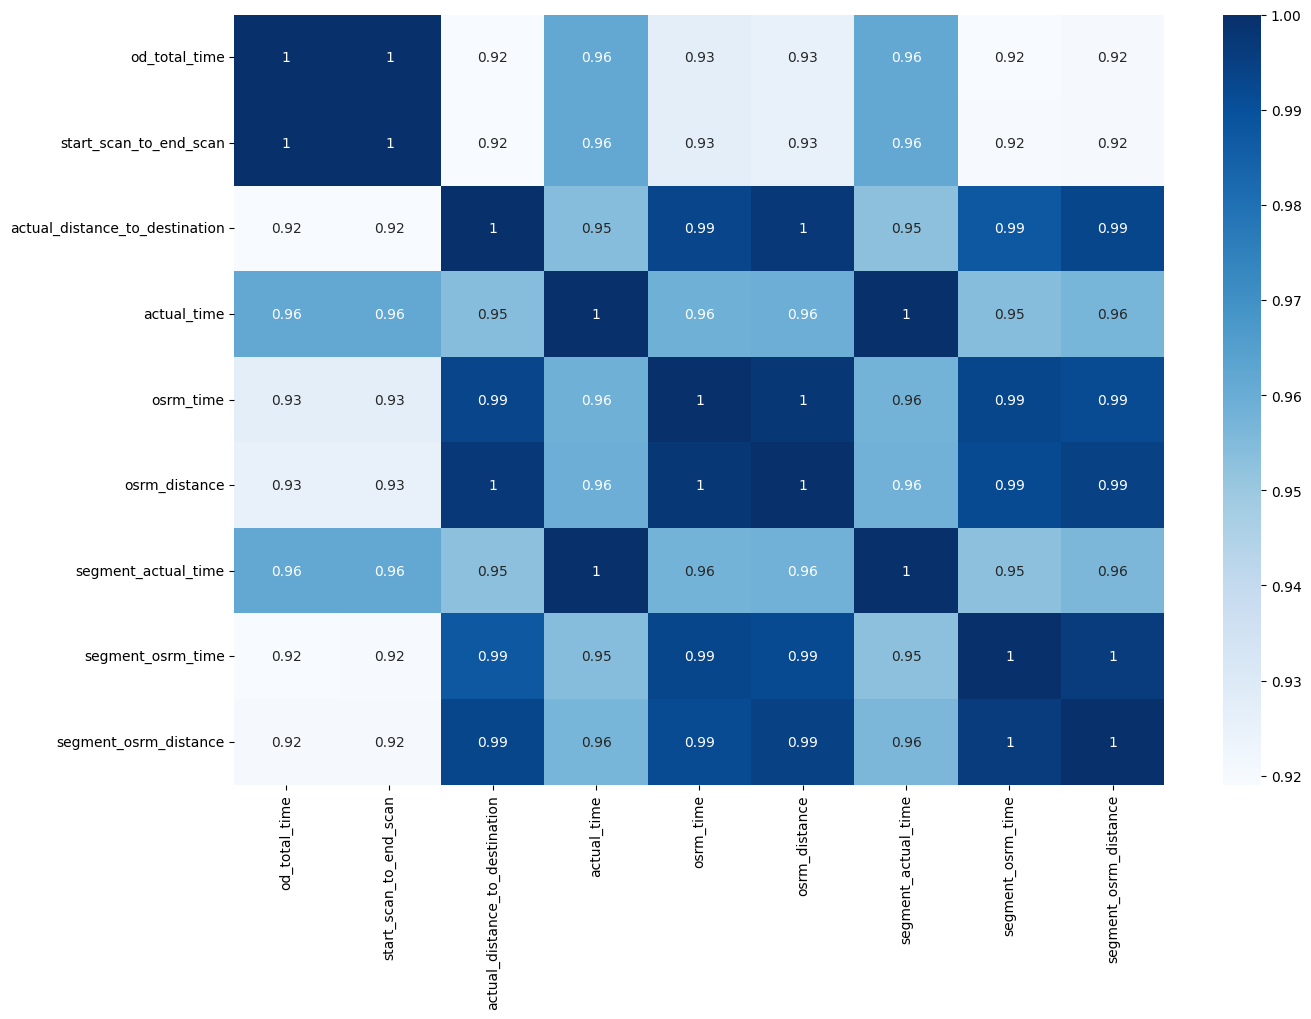

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = corr_df, annot = True, cmap='Blues')
plt.plot()

## Hypothesis Testing

###  Does the route_type affect the actual travel time (actual_time)?

In [ ]:
df2.groupby(by = 'route_type')['actual_time'].mean()

,actual_time
route_type,
Carting,125.776443
FTL,705.412659


Since this is categorical vs numerical having only 2 categorical fields, we can use 2 sample T-test

**Null Hypothesis:** There is no significant difference in actual travel time across different route types.

**Alternative Hypothesis:** There is a significant difference in actual travel time across different route types.

In [ ]:
H0 = 'There is no significant difference in actual travel time across different route types'
Ha = 'There is a significant difference in actual travel time across different route types'
alpha = 0.05

#2 sample ttest
t_stat, p_val = stats.ttest_ind(df2[df2['route_type'] == 'Carting']['actual_time'],
                                df2[df2['route_type'] == 'FTL']['actual_time'],
                                alternative='two-sided')

print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')
if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

t-statistic: -71.18729076027243
p-value: 0.0
alpha: 0.05

Result: Reject Null Hypothesis
There is a significant difference in actual travel time across different route types


### Is there a relationship between the distance (osrm_distance) and actual travel time (actual_time)?

Since both the columns are numerical, we have to choose between Pearson and Spearman Correlation based on relation

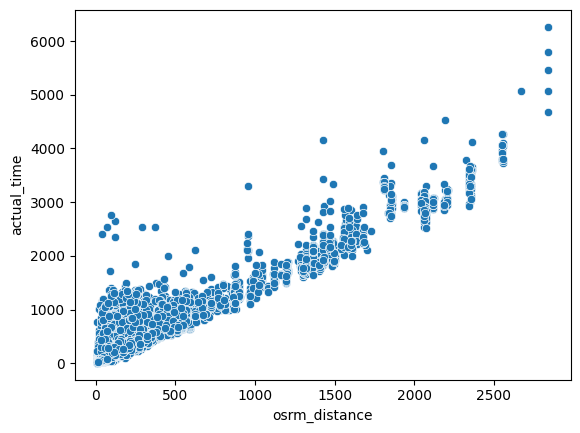

In [ ]:
sns.scatterplot(data = df2, x = 'osrm_distance', y = 'actual_time')
plt.show()

As this is monotonic, we can use spearman correlation

**Null Hypothesis:** There is no correlation between osrm_distance and actual_time.

**Alternative Hypothesis:** There is a correlation between osrm_distance and actual_time.

In [ ]:
H0 = 'There is no correlation between osrm_distance and actual_times'
Ha = 'There is a correlation between osrm_distance and actual_time'
alpha = 0.05

# spearman rank correlation test
spearman_corr, p_val = stats.spearmanr(df['osrm_distance'], df['actual_time'])

print(f'spearman_corr: {spearman_corr}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')
if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

spearman_corr: 0.958806732006333
p-value: 0.0
alpha: 0.05

Result: Reject Null Hypothesis
There is a correlation between osrm_distance and actual_time


### Are the trip creation times (trip_creation_hour) associated with a significant change in travel duration (actual_time)?

For finding relation between trip_creation_hour and actual_time, we need to consider another factor i.e., distance between source and destination (actual_distance_to_destination).

<Axes: >

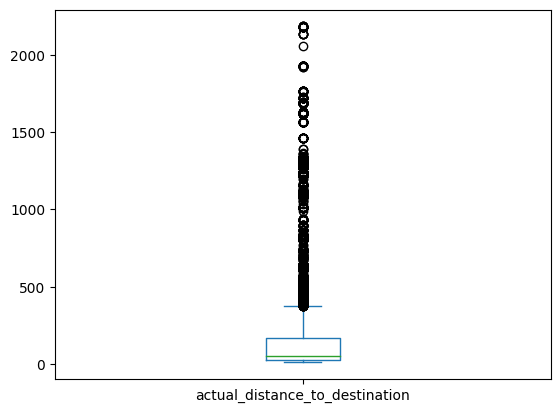

In [ ]:
df2['actual_distance_to_destination'].plot(kind='box')

As distance increases, duration also increases. So we should not consider outliers

In [ ]:
df2['actual_distance_to_destination'].describe()

,actual_distance_to_destination
count,14787.000000
mean,164.090195
std,305.502991
min,9.002461
25%,22.777099
50%,48.287895
75%,163.591255
max,2186.531738


Lets take the range from lower whisker to upper whisker

In [ ]:
df_dtd = df2[(df2['actual_distance_to_destination'] > 22) & (df2['actual_distance_to_destination']< 164)]
df_dtd.groupby(by = 'trip_creation_hour')['actual_time'].mean()

,actual_time
trip_creation_hour,
0,182.624313
1,197.616867
2,200.162018
3,209.062881
4,164.062500
5,258.405701
6,208.511627
7,161.760178
8,172.307693


As this is the categorical vs numerical having more than 2 categorical variables, we have to use ANOVA (if satisfies assumptions of anova) or Kruskal Wallis test

#### Checking assumptions of ANOVA

**Assumptions of ANOVA:**
1. Data should be normally distributed *(QQ plot and shapiro test)*
2. Data should be independent across each record
3. Equal variance in different groups *(levene test)*

As data is independent, we can check for normality and equal variance

##### QQ Plot for checking Normality

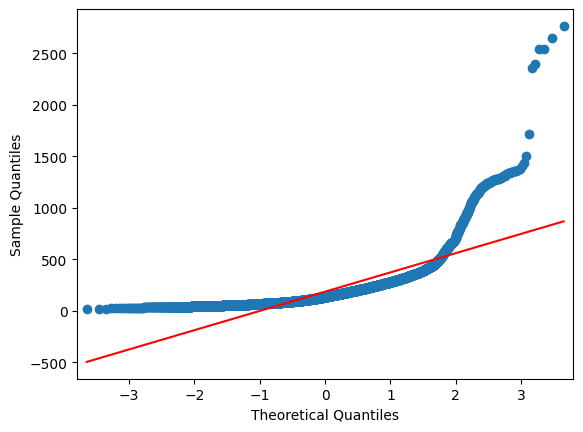

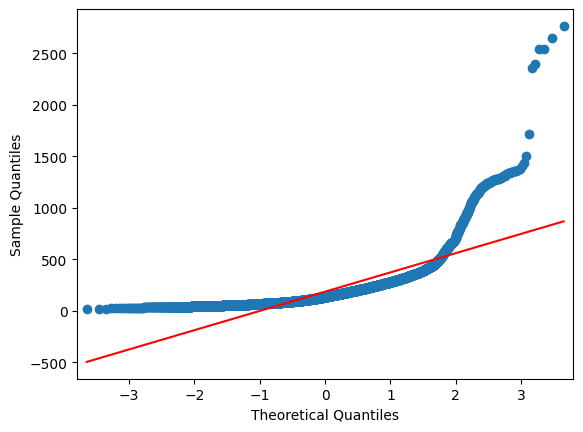

In [ ]:
import statsmodels.api as sm
sm.qqplot(df_dtd['actual_time'], line ='s')

##### Shapiro test for checking Normality

In [ ]:
test_stat, p_value = stats.shapiro(df_dtd['actual_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.5485733900473127e-73
The sample does not follow normal distribution


##### Levene's Test for checking Equal Variance

In [ ]:
hour_groups = [df_dtd[df_dtd['trip_creation_hour'] == hour]['actual_time'] for hour in df_dtd['trip_creation_hour'].unique()]

In [ ]:
test_stat, p_value = stats.levene(*hour_groups)
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 3.309649679336099e-20
The samples do not have Homogenous Variance


We can say that data is not normally distributed and do not have equal variance. So we can use Kruskal Wallis Test

#### Kruskal Wallis test

**Null Hypothesis:** There is no significant difference in actual_time between different hours of the day.

**Alternative Hypothesis:** There is a significant difference in actual_time between different hours of the day.

In [ ]:
H0 = 'There is no significant difference in actual_time between different hours of the day'
Ha = 'There is a significant difference in actual_time between different hours of the day'
alpha = 0.05

# kruskal wallis test
h_stat, p_val = stats.kruskal(*hour_groups)

print(f'h_stat: {h_stat}')
print(f'p-value: {p_val}')
print(f'alpha: {alpha}\n')
if p_val < alpha:
  print('Result: Reject Null Hypothesis')
  print(Ha)
else:
  print('Result: Failed to reject Null Hypothesis')
  print(H0)

h_stat: 247.5250631117618
p-value: 1.5326050640314032e-39
alpha: 0.05

Result: Reject Null Hypothesis
There is a significant difference in actual_time between different hours of the day


## Feature Encoding

In [ ]:
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,...,source_place,destination_state,destination_city,destination_place,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_week
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,...,Central_H_6,Uttar Pradesh,Kanpur,Central_H_6,2018-09-12,12,9,2018,0,37
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,...,ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D,2018-09-12,12,9,2018,0,37
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,...,Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB,2018-09-12,12,9,2018,0,37
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,...,unknown,Maharashtra,Mumbai,MiraRd_IP,2018-09-12,12,9,2018,0,37
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,...,Dc,Karnataka,Sandur,WrdN1DPP_D,2018-09-12,12,9,2018,0,37


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   source_center                   14787 non-null  object        
 2   destination_center              14787 non-null  object        
 3   data                            14787 non-null  category      
 4   route_type                      14787 non-null  category      
 5   trip_creation_time              14787 non-null  datetime64[ns]
 6   source_name                     14787 non-null  object        
 7   destination_name                14787 non-null  object        
 8   od_total_time                   14787 non-null  float64       
 9   start_scan_to_end_scan          14787 non-null  float32       
 10  actual_distance_to_destination  14787 non-null  float32       
 11  ac

 We can remove columns like trip_uuid, trip_creation_time and trip_creation_date for feature encoding as they are redundant

In [ ]:
df_encoded = df2.copy()
df_encoded.drop(columns = ['trip_uuid', 'trip_creation_time', 'trip_creation_date'], inplace = True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   source_center                   14787 non-null  object  
 1   destination_center              14787 non-null  object  
 2   data                            14787 non-null  category
 3   route_type                      14787 non-null  category
 4   source_name                     14787 non-null  object  
 5   destination_name                14787 non-null  object  
 6   od_total_time                   14787 non-null  float64 
 7   start_scan_to_end_scan          14787 non-null  float32 
 8   actual_distance_to_destination  14787 non-null  float32 
 9   actual_time                     14787 non-null  float32 
 10  osrm_time                       14787 non-null  float32 
 11  osrm_distance                   14787 non-null  float32 
 12  segment_actual_tim

In [ ]:
cat_cols = df_encoded.select_dtypes(include='category').columns
obj_cols = df_encoded.select_dtypes(include='object').columns
num_cols = df_encoded.select_dtypes(include=['float64','float32','int8','int16']).columns

### Label Encoding for Categorical columns having 2 unique values

In [ ]:
for i in cat_cols:
  print(df_encoded[i].value_counts())

data
training    10645
test         4142
Name: count, dtype: int64
route_type
Carting    8906
FTL        5881
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_cols:
  df_encoded[i] = label_encoder.fit_transform(df_encoded[i])

In [ ]:
df_encoded[cat_cols].head()

,data,route_type
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1


### Frequency Encoding for Categorical columns having more than 2 fields

As there is no target variable, we are using frequency encoding instead of Target Encoding.

In [ ]:
for i in obj_cols:
  freq_mapping = df_encoded[i].value_counts(normalize=True)
  df_encoded[i] = df_encoded[i].map(freq_mapping)

In [ ]:
df_encoded[obj_cols].head()

,source_center,destination_center,source_name,destination_name,source_state,source_city,source_place,destination_state,destination_city,destination_place
0,0.007912,0.006425,0.007912,0.006425,0.051396,0.009806,0.007912,0.054440,0.010009,0.006425
1,0.000812,0.000812,0.000812,0.000812,0.144925,0.000812,0.000812,0.155136,0.000812,0.000812
2,0.071144,0.055522,0.071144,0.055522,0.123284,0.078042,0.071144,0.110908,0.063299,0.055522
3,0.020288,0.012511,0.020288,0.012511,0.183540,0.097518,0.043552,0.173193,0.104687,0.012511
4,0.001217,0.000609,0.001217,0.000609,0.144925,0.001217,0.002435,0.155136,0.000609,0.000609


### Scaling for Number Columns

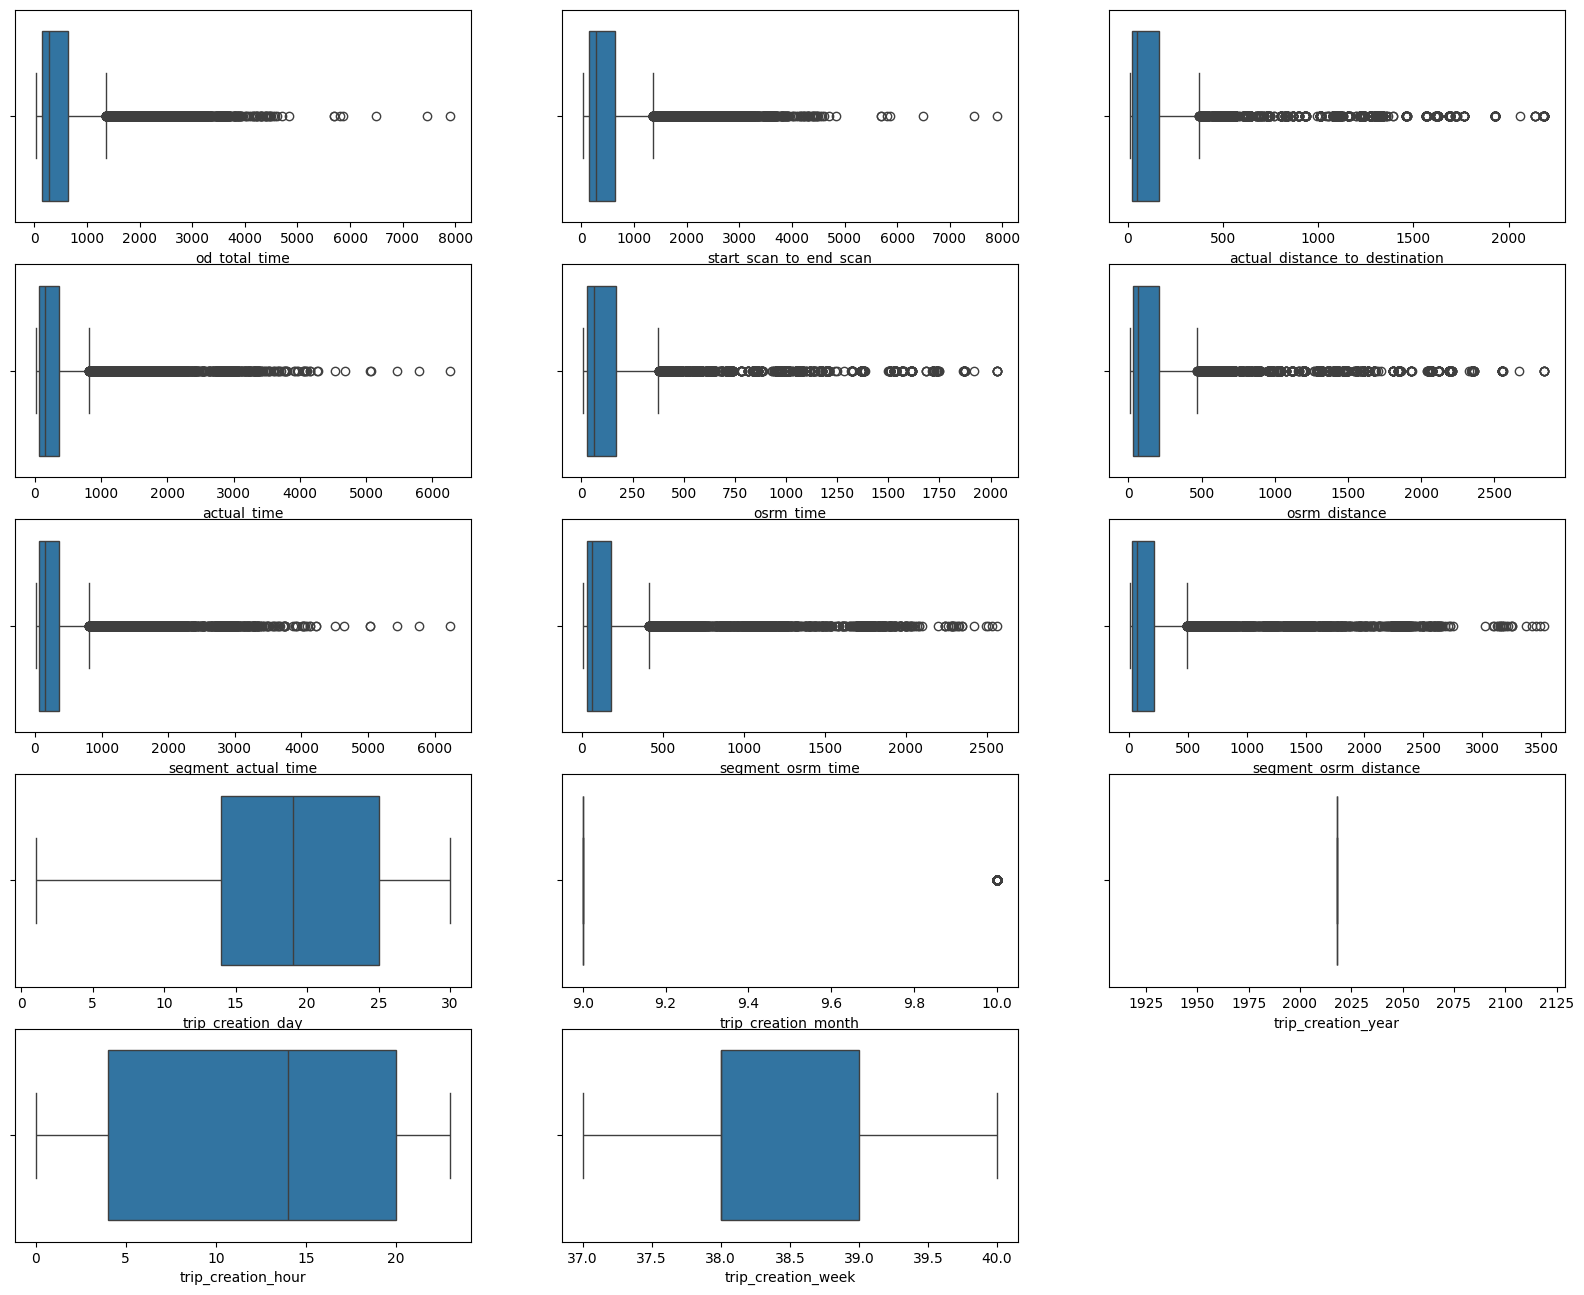

In [ ]:
fig = plt.figure(figsize = (20,16))
for i in num_cols:
  plt.subplot(5,3,num_cols.tolist().index(i)+1)
  sns.boxplot(x = df_encoded[i])

- As there are no outliers for segment_actual_time, segment_osrm_distance, trip_creation_day, trip_creation_month, we can use min max scaler for these.
- We can use standard scaler for the rest as they have outliers.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_cols = ['segment_actual_time', 'segment_osrm_distance', 'trip_creation_day', 'trip_creation_month']
scaler = MinMaxScaler()
df_encoded[min_max_cols] = scaler.fit_transform(df_encoded[min_max_cols])

In [ ]:
df_encoded[min_max_cols].head()

,segment_actual_time,segment_osrm_distance,trip_creation_day,trip_creation_month
0,0.247388,0.373134,0.37931,0.0
1,0.021218,0.021373,0.37931,0.0
2,0.530301,0.721625,0.37931,0.0
3,0.008037,0.003074,0.37931,0.0
4,0.053207,0.039185,0.37931,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
cols = list(set(num_cols) - set(min_max_cols))
df_encoded[cols] = standard_scaler.fit_transform(df_encoded[cols])

In [ ]:
df_encoded[cols].head()

,actual_time,actual_distance_to_destination,segment_osrm_time,trip_creation_hour,osrm_time,trip_creation_week,trip_creation_year,od_total_time,osrm_distance,start_scan_to_end_scan
0,2.147277,2.162548,2.629714,-1.559538,2.048290,-1.337602,0.0,2.627300,2.125107,2.627598
1,-0.379887,-0.297563,-0.367090,-1.559538,-0.342571,-1.337602,0.0,-0.529628,-0.320538,-0.530859
2,5.326268,5.772034,5.594737,-1.559538,5.816936,-1.337602,0.0,5.170234,5.802622,5.170772
3,-0.529486,-0.480911,-0.522809,-1.559538,-0.537818,-1.337602,0.0,-0.652837,-0.497115,-0.652397
4,-0.027259,-0.119943,-0.208192,-1.559538,-0.162059,-1.337602,0.0,0.285584,-0.154082,0.284962


In [ ]:
# Final Encoded data
df_encoded.head()

,source_center,destination_center,data,route_type,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,source_city,source_place,destination_state,destination_city,destination_place,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_week
0,0.007912,0.006425,1,1,0.007912,0.006425,2.627300,2.627598,2.162548,2.147277,...,0.009806,0.007912,0.054440,0.010009,0.006425,0.37931,0.0,0.0,-1.559538,-1.337602
1,0.000812,0.000812,1,0,0.000812,0.000812,-0.529628,-0.530859,-0.297563,-0.379887,...,0.000812,0.000812,0.155136,0.000812,0.000812,0.37931,0.0,0.0,-1.559538,-1.337602
2,0.071144,0.055522,1,1,0.071144,0.055522,5.170234,5.170772,5.772034,5.326268,...,0.078042,0.071144,0.110908,0.063299,0.055522,0.37931,0.0,0.0,-1.559538,-1.337602
3,0.020288,0.012511,1,0,0.020288,0.012511,-0.652837,-0.652397,-0.480911,-0.529486,...,0.097518,0.043552,0.173193,0.104687,0.012511,0.37931,0.0,0.0,-1.559538,-1.337602
4,0.001217,0.000609,1,1,0.001217,0.000609,0.285584,0.284962,-0.119943,-0.027259,...,0.001217,0.002435,0.155136,0.000609,0.000609,0.37931,0.0,0.0,-1.559538,-1.337602


# Insights

- The data spans from September 12, 2018, 00:00:16 to October 8, 2018, 03:00:24.

- There are approximately 14,817 unique trip IDs, 1,508 unique source centers, 1,481 unique destination centers, 690 unique source cities, and 806 unique destination cities.

- The most common route type is Carting.

- The number of trips starts to increase after noon, peaks around 10 P.M., and then declines afterward.

- Most orders are sourced from states like Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.

- The highest number of trips originated from Mumbai and Bengaluru, followed by Gurgaon, Delhi, and Bhiwandi, suggesting a strong seller base in these cities.

- The majority of trips concluded in Maharashtra, followed by Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh, indicating a high volume of orders in these states.

- Cities with the highest number of completed trips include Mumbai and Bengaluru, followed by Gurgaon, Delhi, and Chennai, reflecting significant order placement in these cities.

- In terms of destination cities, Bengaluru, Mumbai, Gurgaon, Bangalore, and Delhi see the most orders.

- There is a significant variation in actual travel time across different route types.

- A strong correlation exists between OSRM distance and actual travel time.

- There is a significant difference in actual travel time depending on the time of day.

# Recommendations

- **Optimize Peak Time Operations:**
Since trips surge after noon, peaking at 10 P.M., Delhivery should allocate additional resources, such as drivers, vehicles, and support staff, during these times to handle the increased demand effectively.

- **Enhance Carting Route Efficiency:**
Given that Carting is the most common route type, Delhivery should focus on improving Carting-specific resources, such as vehicle optimization and increasing fleet availability for this route to boost operational efficiency.

- **Expand Infrastructure in Key Sourcing Regions:**
As most orders originate from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana, Delhivery should invest in expanding regional hubs and warehousing capacity in these states to streamline logistics and reduce supply chain bottlenecks.

- **Strengthen Seller Relations in Major Cities:**
With strong trip origin bases in Mumbai, Bengaluru, Gurgaon, Delhi, and Bhiwandi, Delhivery should enhance seller engagement by providing faster pickups, tailored fulfillment solutions, and better support services to boost collaboration.

- **Improve Last-Mile Logistics in High-Demand Cities:**
To handle the high volume of trips ending in cities like Mumbai, Bengaluru, Gurgaon, Delhi, and Chennai, Delhivery should establish micro-fulfillment centers and utilize local delivery networks to shorten last-mile delivery times. Implementing electric vehicles for urban logistics can further reduce costs and improve sustainability.

- **Leverage AI for Dynamic Route Optimization:**
Using AI-powered tools, Delhivery can dynamically adjust routes based on factors like traffic, order density, and time of day, minimizing delays and improving delivery efficiency.

- **Offer Time-Sensitive Delivery Slots:**
With travel times varying by time of day, Delhivery can introduce customer-specific delivery slots and promote off-peak delivery options to reduce congestion during high-demand periods while ensuring timely deliveries in lower-traffic hours.

- **Implement Predictive Maintenance and Driver Management:**
To maintain fleet efficiency and prevent breakdowns during peak times, Delhivery should adopt predictive maintenance strategies for vehicles. Additionally, implementing driver fatigue management programs will ensure optimal driver performance during long or high-demand shifts.